## EDA for Hours Spent on Labs Survey

In [9]:
suppressPackageStartupMessages(library(tidyverse))
library(gridExtra)
options(warn=-1)

This analysis will investigate the following question:

*How does the number of times a Master of Data Science (MDS) student goes to office hours affect the average number of hours they spend working on labs per week?*

based on the results collected from this [survey](https://ubc-mds.slack.com/archives/C24HU8X0W/p1554330074049900). We stored our raw data in this [repo]().

In [2]:
# Load survey data
rawdata = suppressMessages(read_csv("Hours_Spent_On_Labs_Survey_Final.csv"))

In [3]:
# Data cleaning
raw_df = data.frame(rawdata)
row_to_remove = c(1:2)
col_to_remove = c(1:19, 21, 25, 30, 31)
df = raw_df[-row_to_remove, -col_to_remove]
names(df) <- c("attend_OH", "lab_hours", "group", "academic", "yrs_out_school", "program", "stat", "optional")
df <- df %>% mutate(group = as.factor(group), academic = as.factor(academic), yrs_out_school= as.integer(yrs_out_school)) %>% select (lab_hours, everything())


In [4]:
head(df)

lab_hours,attend_OH,group,academic,yrs_out_school,program,stat,optional
20,0,Mostly alone,Engineering,0,3,2,3
20,2,Mostly alone,Science,0,3,3,4
15,0,Mostly alone,Business,2,4,2,1
19,4,Mostly in groups,Math,6,3,3,1
20,0,Mostly alone,Engineering,0,4,3,1
30,5,Mostly in groups,Math,6,2,2,3


In [5]:
# write.csv(df, file = "clean_data.csv")

### Variables description 

- **lab_hours**: Average number of hours spent working on labs per week (hours)

- **attend_OH**: Number of times a student attends office hours per week (integer)

- **group**: Work style 'mostly in groups' or 'mostly alone'

- **academic**: Academic background (Engineering, Science, Business, Math, Other)

- **yrs_out_school**: Number of years a student has been out-of-school (To the nearest year)

- **program**: Programming skills, from 1(low) to 5(high)

- **stat**: Statistical skills, from 1(low) to 5(high)

- **optional**: How frequently a student does optional questions, 1(never), 5(always)

### Exploring the distribution of explanatory variables

In [6]:
df2 <- df %>% select(2:8)  %>% 
    drop_na()  %>% 
    gather(variable,value,convert=TRUE) %>%
    group_by(variable, value) %>% 
    summarize(Count=n())

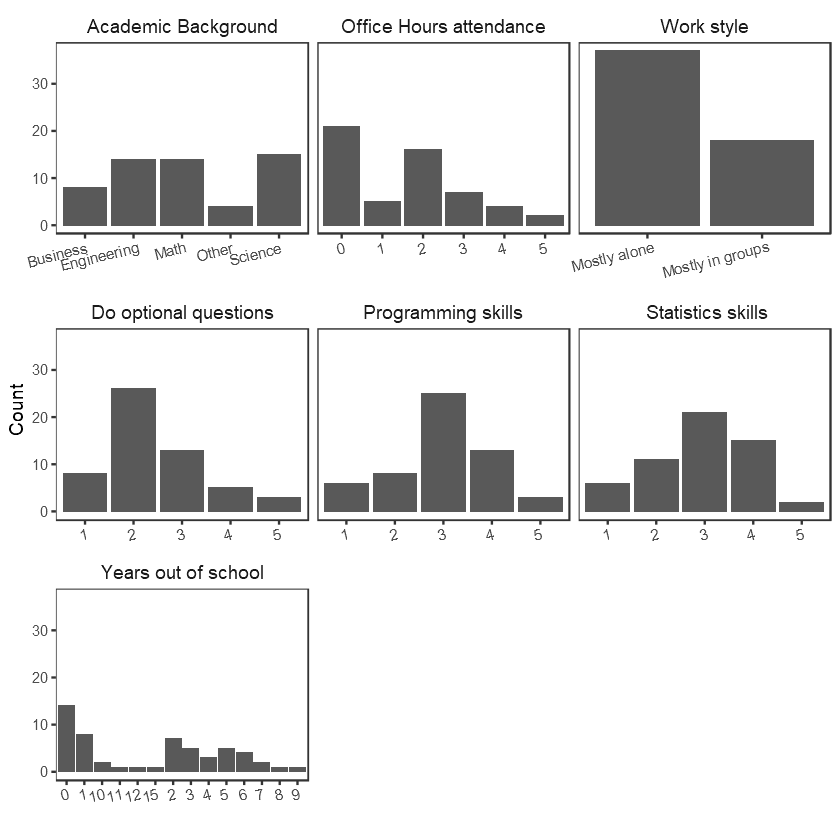

In [7]:
labels<- c(
    `academic`="Academic Background",
    `attend_OH`="Office Hours attendance",
    `group`="Work style",
    `optional`="Do optional questions",
    `program`= "Programming skills",
    `stat`=" Statistics skills",
    `yrs_out_school`= "Years out of school"
    
  )

ggplot(df2,aes(value, Count)) + 
        geom_bar(position=position_dodge(preserve="single"), stat="identity")+
        facet_wrap(~variable, scales="free_x", labeller=as_labeller(labels))+
        theme_bw()+ 
        theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11),
            axis.text.x = element_text(angle = 14, hjust = 1))+
        xlab("")+
        ylab("Count")

### Observations:
xxxxxx

### Exploring relationship between variables

#### 1- Attending office hours and average number of hours spent on lab

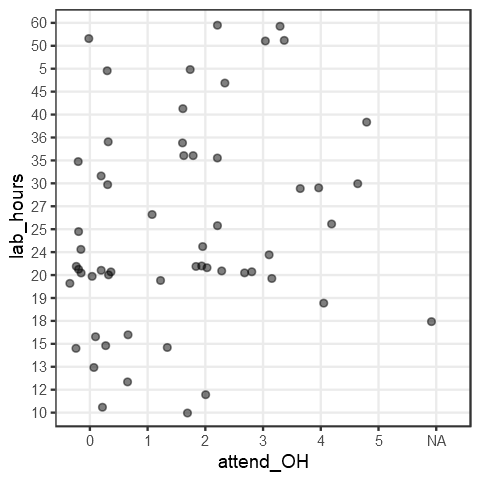

In [8]:
options(repr.plot.width = 4, repr.plot.height = 4)
df %>% 
ggplot(aes(attend_OH, lab_hours)) +
    #facet_grid(.~group,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()

### Observations: 
xxxxx

#### 2- Facetting by potential confounding variables